# PROBLEM STATEMENT-

### *XRides data-set includes data for ~40,000 trips. The data-set records major elements of a trip such as the location it was booked, the time it was booked, chosen package for the trip and other features. We need to analyze this data set so that we can increase business, make life of cab-drivers more efficient and also reduce cancellation of rides.*

# SOLUTION-
### 1. The basic approach was to analyze the data and find locations that have highest trip booking volumes. We had 3 features that can help us identify these locations - from_area_id, from_lat and from_long. We identified that there are 598 from_area_id and XRides gains 19.07% of it's business from the area id's (393.0, 572.0 and 293.0). If XRides focuses on these three regions it can gain more business. On analyzing these 3 areas we can develope a personalized strategy for them. Further, there are heatmaps that show how time and days play an important role in cab bookings in these particular area and these heatmap would help in identifying the time domain for particular weekdays to increase business. 

### 2. We identified that many cabs were cancelled from_area_id (393.0 and 572.0, cancellations above 100)  these cancellation may have been caused due to locality problems or the duration of the cab to reach the location during traffic hours. These location could use increased number of cabs at peak hours. There are dataframes which show the trends of cab cancellation on the basis of time, different areas and weekdays. 

### *The detailed answer is at the bottom of the page* 

## Initial EDA ##

In [1]:
#importing python libraries for analysis.
import numpy as np
import pandas as pd

In [2]:
#importing libraries essential for plotting of data on graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data
df = pd.read_csv('Data.csv')

In [4]:
df.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0


In [5]:
#to check for total, missing values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

In [6]:
df.from_area_id.nunique()

598

### Some features like package_id, from_city_id, to_city_id, to_date and many other features (see result above) have missing values and hence not reliable for analysis.

# CONVERTING DATE 

In [7]:
#Dividing date-time to DAY of MONTH - WEEKDAY - HOUR into seperate columns 
df['from_date']=df['from_date'].map(pd.to_datetime)

In [8]:
def get_dom(dt):
    return dt.day
df['dayofm']=df['from_date'].map(get_dom)

In [9]:
def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['from_date'].map(get_weekday)

In [10]:
def get_hour(dt):
    return dt.hour
df['hour']=df['from_date'].map(get_hour)

In [11]:
df.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,dayofm,weekday,hour
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,...,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1,1,2
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,...,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1,1,9
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,...,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1,1,3


# CHECKING TRAFFIC BY DAY

C:\Users\Sushant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


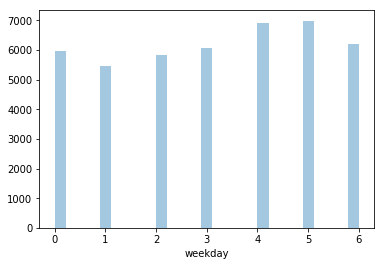

In [12]:
#Rides Taken by day
sns.distplot(df['weekday'],kde=False);

### From the above graph we get to know that most cabs are booked on weekends, i.e., FRIDAYs and SATURDAYs

# COMPARING PARTICULAR FROM_AREA_ID's TIME AND DAY

In [214]:
#Checking most cabs booked in particular area
df_area.head()

393.0     3858
571.0     1631
293.0     1052
585.0      911
1010.0     768
Name: from_area_id, dtype: int64

In [216]:
# percentage of trips of major three areas
((3858+1631+1052)/34293) * 100

19.073863470679147

In [218]:
# percentage of trips of major area (individual)
(3858/34293) * 100

11.25010935176275

In [222]:
# percentage of trips of major area (individual)
(1631/34293) * 100

4.756072667891406

In [221]:
# percentage of trips of major area (individual)
(1052/34293) * 100

3.0676814510249906

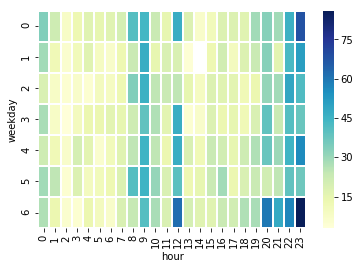

In [207]:
#Plotting a heatmap to check cabs booked on a particular day at which time and in a PARTICULAR AREA-393.0
df11 = df.loc[df['from_area_id'] == 393.0]

def count_rows(rows):
    return len(rows)

by_date11 = df11.groupby('dayofm').apply(count_rows)

by_TimeDate11 = df11.groupby('weekday hour'.split()).apply(count_rows).unstack()

sns.heatmap(data=by_TimeDate11, linecolor='white',linewidths=1, cmap='YlGnBu');

## We can make out from the heatmap that most cabs in the area_id 393.0 are booked at 23:00 and during office commute hours.

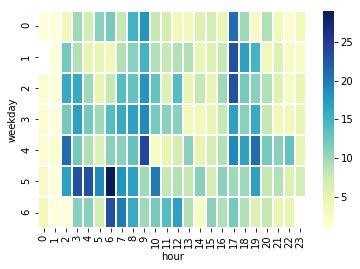

In [208]:
#Plotting a heatmap to check cabs booked on a particular day at which time and in a PARTICULAR AREA- 571.0
df12 = df.loc[df['from_area_id'] == 571.0]

def count_rows(rows):
    return len(rows)

by_date12 = df12.groupby('dayofm').apply(count_rows)

by_TimeDate12 = df12.groupby('weekday hour'.split()).apply(count_rows).unstack()

sns.heatmap(data=by_TimeDate12, linecolor='white',linewidths=1, cmap='YlGnBu');

## We can make out of the heatmap that most cabs in the area_id 571.0 are booked at 6:00 and during office commute hours.

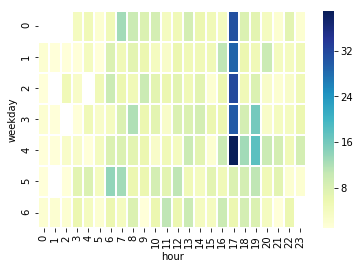

In [204]:
#Plotting a heatmap to check cabs booked on a particular day at which time and in a PARTICULAR AREA-293.0
df13 = df.loc[df['from_area_id'] == 293.0]

def count_rows(rows):
    return len(rows)

by_date13 = df13.groupby('dayofm').apply(count_rows)

by_TimeDate13 = df13.groupby('weekday hour'.split()).apply(count_rows).unstack()

by_TimeDate13

sns.heatmap(data=by_TimeDate13, linecolor='white',linewidths=1, cmap='YlGnBu');

## We can make out of the heatmap that most cabs in the area_id 293.0 are booked during office commute hours.

# CHECKING TRAFFIC BY HOUR

In [13]:
#Rides Taken by hour
df_hour= df.hour.value_counts()

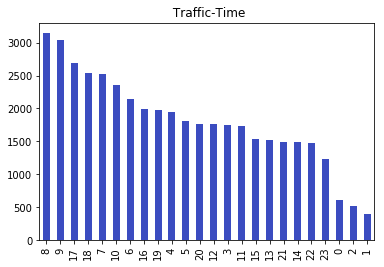

In [14]:
df_hour.plot(kind='bar',colormap='coolwarm').set_title(' Traffic-Time');

### The graph above clearly shows that most rides are taken during the office hours i.e., between 8:00-9:59 and during the evening between 17:00-18:59

# CHECKING TRAFFIC BY DAY AND HOUR

In [177]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('dayofm').apply(count_rows)

In [178]:
by_TimeDate = df.groupby('weekday hour'.split()).apply(count_rows).unstack()

In [179]:
by_TimeDate

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,71,64,70,237,301,276,342,407,530,460,...,217,184,220,371,353,237,207,151,156,133
1,85,50,61,212,217,194,226,346,452,444,...,166,172,262,409,375,244,211,183,143,139
2,61,44,73,211,212,187,253,374,466,476,...,180,200,318,406,358,247,236,181,184,146
3,73,41,67,226,262,290,259,347,489,464,...,172,196,262,430,373,293,253,219,230,140
4,82,48,76,270,265,245,308,350,490,448,...,230,248,345,461,478,385,321,301,300,230
5,120,74,105,359,390,337,420,352,387,411,...,268,297,312,300,314,315,293,253,211,237
6,112,74,64,233,305,277,336,353,334,332,...,253,234,278,309,296,259,249,205,246,203


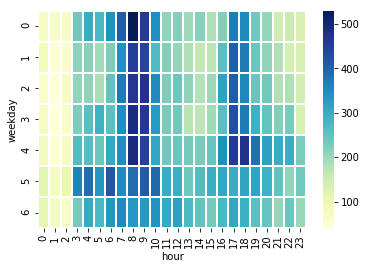

In [18]:
#plotting a heatmap to see when and at which day there's more traffic compared to others
sns.heatmap(data=by_TimeDate, linecolor='white',linewidths=1, cmap='YlGnBu');

### The above heatmap basically depicts the number of cabs that are booked on each day and on which time. Through this graph we infer that most cabs are booked during the office commute hours, except on Saturdays and Sundays.

# CHECKING TRAFFIC BY LONG AND LAT

In [59]:
#Checking unique values in from_lat and from_long.
df[['from_lat', 'from_long']].nunique()

from_lat     466
from_long    462
dtype: int64

In [62]:
#Creating a dummy table with latitude, longitude and a Unique id.
a = pd.DataFrame(df.groupby(['from_lat', 'from_long'])['id'].count())

In [63]:
# combine lat and long (from) to get the specific location of the place
df['from_lat_long'] = df['from_lat'].astype(str)+","+df['from_long'].astype(str)

### *CREATING DUMMY LOCATION AND PROVIDING THEM A NAME*

In [64]:
# adding a name to each location
dummy_location = []
for i in range(0,467):
    x = 'Loc'+'-'+str(i)
    dummy_location.append(x)

In [23]:
#df_final = pd.merge(df, df1)
b = a.reset_index()
df1 = b[['from_lat', 'from_long']]
df1['dummy_loc'] = pd.Series(dummy_location).values

In [24]:
df1.head()

,from_lat,from_long,dummy_loc
0,12.77663,77.56382,Loc-0
1,12.78091,77.77131,Loc-1
2,12.78665,77.63761,Loc-2
3,12.79665,77.38693,Loc-3
4,12.80257,77.70453,Loc-4


In [25]:
#get the location on the original dataset
df_final = pd.merge(df, df1, on = ['from_lat', 'from_long'], how = 'left')

In [67]:
#to check now, which columns exist in the dataframe
colnames = df_final.columns

In [103]:
#to check now, which columns exist in the dataframe
colnames

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'dayofm', 'weekday', 'hour', 'from_lat_long', 'dummy_loc'],
      dtype='object')

# CHECKING TRAFFIC BY LOCATION AND WEEKDAY

In [151]:
#Creating a dataframe for distinguishing LOCATION and WEEKDAY from others
df_analysis1 = df_final[['id', 'from_area_id', 'weekday','dummy_loc']]

In [152]:
#assigning the values in df_analysis1 a Unique ID.
df_analysis1_1 = df_analysis1.groupby(['from_area_id','weekday', 'dummy_loc'])['id'].count().reset_index()

In [153]:
#Assigning column names in the data frame.
df_analysis1_1.columns = ['from_area_id','weekday','dummy_loc', 'counts']

In [154]:
#sorting values as needed.
df_analysis1_1.sort_values('counts',  ascending = False).head(10)

,from_area_id,weekday,dummy_loc,counts
747,393.0,6,Loc-462,680
741,393.0,0,Loc-462,610
745,393.0,4,Loc-462,575
746,393.0,5,Loc-462,563
744,393.0,3,Loc-462,490
743,393.0,2,Loc-462,481
742,393.0,1,Loc-462,459
1084,571.0,5,Loc-168,301
1083,571.0,4,Loc-168,256
1082,571.0,3,Loc-168,240


In [155]:
#Checking the lat and long on the particular location.
df1.iloc[462]

from_lat     13.1996
from_long    77.7069
dummy_loc    Loc-462
Name: 462, dtype: object

### From the above TABLE we infer that most cabs were booked from_area_id 393.0 on Loc-462(Lat-13.1996 , Long-77.7069)

# CHECKING TRAFFIC BY LOCATION & HOUR

In [32]:
#Creating a dataframe for distinguishing LOCATION and HOUR from others
df_analysis2 = df_final[['id', 'hour', 'dummy_loc']]

In [75]:
#assigning the values in df_analysis2 a Unique ID.
df_analysis2_1 = df_analysis2.groupby(['hour', 'dummy_loc'])['id'].count().reset_index()

In [34]:
#Assigning column names in the data frame.
df_analysis2_1.columns = ['hour','dummy_loc', 'counts']

In [56]:
#sorting values as needed.
df_analysis2_1.sort_values(by = 'counts', ascending = False).head()

,hour,dummy_loc,counts
6522,23,Loc-462,378
6281,22,Loc-462,320
2501,9,Loc-462,307
3380,12,Loc-462,287
5760,20,Loc-462,255


In [73]:
#Checking the lat and long on the particular location.
df1.iloc[462]

from_lat     13.1996
from_long    77.7069
dummy_loc    Loc-462
Name: 462, dtype: object

### The above table shows us that most cabs were booked at Loc-462(Lat-13.1996 , Long-77.7069) At 23:00.

# CHECKING TRAFFIC BY LOCATION, HOUR & WEEKDAY

In [82]:
#Creating a dataframe for distinguishing LOCATION, HOUR and WEEKDAY from others
df_analysis3 = df_final[['id', 'weekday', 'hour', 'dummy_loc']]

In [83]:
#assigning the values in df_analysis3 a Unique ID.
df_analysis3_1 = df_analysis3.groupby(['weekday', 'hour','dummy_loc'])['id'].count().reset_index()

In [84]:
#Assigning column names in the data frame.
df_analysis3_1.columns = ['weekday','hour' , 'dummy_loc', 'counts' ]

In [85]:
#sorting values as needed.
df_analysis3_1.sort_values(by = 'counts', ascending = False).head()

,weekday,hour,dummy_loc,counts
19117,6,23,Loc-462,86
2540,0,23,Loc-462,68
17821,6,12,Loc-462,62
18831,6,20,Loc-462,60
19030,6,22,Loc-462,57


In [86]:
#Checking the lat and long on the particular location.
df1.iloc[462]

from_lat     13.1996
from_long    77.7069
dummy_loc    Loc-462
Name: 462, dtype: object

### The above table shows us that most cabs were booked at Loc-462(Lat-13.1996 , Long-77.7069) At 23:00 on a Sunday.

## CHECKING CANCELLATION ON THE BASIS OF FROM_AREA_ID

In [87]:
#information about car cancellation.
df.Car_Cancellation.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

In [88]:
#Creating a dataframe for distinguishing CAR_CANCELLATION & FROM_AREA_ID from others
df_analysis6 = df_final[['id', 'Car_Cancellation', 'from_area_id']]

In [89]:
#assigning the values in df_analysis6 a Unique ID.
df_analysis6_1 = df_analysis6.groupby(['Car_Cancellation', 'from_area_id'])['id'].count().reset_index()

In [90]:
#Assigning column names in the data frame.
df_analysis6_1.columns = ['Car_Cancellation', 'from_area_id', 'counts' ]

In [223]:
#sorting values as needed.
df_analysis6_1.sort_values([ 'Car_Cancellation','counts'], ascending=[False, False]).head()

,Car_Cancellation,from_area_id,counts
731,1,571.0,127
692,1,393.0,116
672,1,293.0,99
608,1,83.0,68
796,1,1010.0,53


### The above table depicts that there were many cancellations from_area_id-571.0 and 393.0. Both the areas record cancellations above 100.

## CHECKING CANCELLATION ON THE BASIS OF TIME, WEEKDAY,  LOCATION AND FROM_AREA_ID

In [92]:
#Creating a dataframe for distinguishing CAR_CANCELLATION, WEEKDAY, HOUR, DUMMY LOC & FROM_AREA_ID from others
df_analysis4 = df_final[['id', 'weekday','hour','Car_Cancellation', 'from_area_id' , 'dummy_loc']]

In [93]:
#assigning the values in df_analysis4 a Unique ID.
df_analysis4_1 = df_analysis4.groupby(['weekday','hour','Car_Cancellation', 'from_area_id', 'dummy_loc'])['id'].count().reset_index()

In [94]:
#Assigning column names in the data frame.
df_analysis4_1.columns = ['weekday','hour','Car_Cancellation', 'from_area_id', 'dummy_loc' , 'counts' ]

In [95]:
#sorting values as needed.
df_analysis4_1.sort_values([ 'Car_Cancellation','counts'], ascending=[False, False]).head()

,weekday,hour,Car_Cancellation,from_area_id,dummy_loc,counts
1705,0,12,1,393.0,Loc-462,9
2999,0,23,1,393.0,Loc-462,8
22266,6,23,1,393.0,Loc-462,8
14385,4,17,1,571.0,Loc-168,6
14604,4,18,1,571.0,Loc-168,6


### From the above table we get to know that there were many cancellations from_area_id- 393.0 during midnight and then from_area_id-571.0 during the evening.

## CHECKING CANCELLATION ON THE BASIS OF FROM_AREA_ID & LOCATION

In [96]:
#Creating a dataframe for distinguishing CAR_CANCELLATION, DUMMY_LOC & FROM_AREA_ID from others
df_analysis5 = df_final[['id', 'Car_Cancellation', 'from_area_id' , 'dummy_loc']]

In [97]:
#assigning the values in df_analysis5 a Unique ID.
df_analysis5_1 = df_analysis5.groupby(['Car_Cancellation', 'from_area_id', 'dummy_loc'])['id'].count().reset_index()

In [98]:
#Assigning column names in the data frame.
df_analysis5_1.columns = ['Car_Cancellation', 'from_area_id', 'dummy_loc' , 'counts' ]

In [99]:
#sorting values as needed.
df_analysis5_1.sort_values([ 'Car_Cancellation','counts'], ascending=[False, False]).head()

,Car_Cancellation,from_area_id,dummy_loc,counts
729,1,571.0,Loc-168,127
690,1,393.0,Loc-462,116
670,1,293.0,Loc-15,99
606,1,83.0,Loc-94,68
794,1,1010.0,Loc-227,53


### From the above table we get to know that there were many cancellations from_area_id 571.0(Loc-168) and then from_area_id-393(Loc-462)






# **RESULTS**


## ANALYSIS

### 1. It's pretty clear that most cabs are booked on the weekends mainly, Friday and Saturday.

### 2. It's pretty clear that cabs are booked in the morning at 8:00,9:00 and in the evening at 17:00,18:00.

### 3. Through the Heatmap(Day&Hour) it's clear that cabs are booked at 8:00,9:00 in the morning and 17:00,18:00 in the evening mostly everyday.

### 4. We get to know that most cabs were booked was from_area_id- 393.0 on Loc-462(Lat-13.1996 , Long-77.7069) on a Sunday.

### 5.  We get to know that most cabs were booked was from_area_id- 393.0 on Loc-462(Lat-13.1996 , Long-77.7069) at 23:00.

### 6. Most cabs were booked from_area_id-393.0 at Loc-462(Lat-13.1996 , Long-77.7069) at 23:00 on a Sunday.

### 7. We get to know that there were many cancellation from_area_id- 571.0(count-127) and then from_area_id- 393.0(count-116).

### 8. We get to know that there were many cancellations from_area_id-393.0 during midnight and then from_area_id-571.0 during the evening.

### 9.### WE GET TO KNOW THAT THERE WERE MANY CANCELLATION FROM_AREA_ID- 571.0 (LOC-168) AND THEN FROM_AREA_ID- 393.0 (LOC-462).

### 10. We can make out from the heatmap that most cabs in the area_id 393.0 are booked at 23:00 and during office commute hours.

### 11. We can make out of the heatmap that most cabs in the area_id 572.0 are booked at 6:00 and during office commute hours.

### 12. We can make out of the heatmap that most cabs in the area_id 293.0 are booked during office commute hours.


# ADDITIONAL POINTS 

### 1. More cabs can be deployed in the from_area_id-393.0 and from_area_id-571.0 during rush hours which are usually office hours namely :- 8:00-10:00 and 17:00-18:00 to incentivize the drivers. 

### 2. A surge could be applied to these areas when cab isn't available even after deploying more cabs to increase business.

### 3. There were lot of cancellations from_area_id 571.0(Loc-168) and 393.0(Loc-462) which are also the most grossing zones. The cancellation could be caused by 
### (i) duration of cab to reach the location may be longer due to unavailability of cabs
### (ii) it may be zone which is difficult to reach.
### (iii) some of the cancellations happened at midnight, which can reflect security issues.

### 4. Revenue can be increased by deploying more cars in rush hours in the areas such as 393.0 and 571.0 which are booking dominant area and hence reduce cost.